#Taller-1 Teoría de Señales - Bases de datos V1-Manual
# 19 de Abril de 2023

###*Integrantes:*
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# Función de activación ReLU
def relu(x):
    return tf.maximum(0.0, x)

# Función de activación sigmoide
def sigmoid(x):
    return tf.math.sigmoid(x)

# Función de pérdida MSE
def mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [3]:
# Preprocesamiento de los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

In [6]:
# Eliminar filas con valores nulos
data = data.dropna()
data = data.replace('?', np.nan)
# Convertir los valores de las columnas a float
data = data.astype(float)
# Reemplazar valores faltantes por la media de la columna
data = data.fillna(data.mean())
# Convertir la columna 'target' a valores binarios (0 o 1)
data['target'][data['target']>0] = 1
# Dividir los datos en características (X) y etiquetas (Y)
X = data.drop('target', axis=1)
Y = data['target'].values.reshape(-1,1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
# Crear modelo en Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation=relu),
    tf.keras.layers.Dense(16, activation=relu),
    tf.keras.layers.Dense(1, activation=sigmoid)
])

# Compilar modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=mse)

In [12]:
# Entrenar modelo
history = model.fit(X_train, Y_train, epochs=100000, batch_size=32, verbose=0)

In [ ]:
# Evaluar modelo en conjunto de prueba
test_loss = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
# Obtener predicciones del conjunto de prueba
Y_pred = model.predict(X_test)
print("Test loss:", test_loss)

2/2 [==============================] - 0s 6ms/step
Test loss: 0.1331549882888794


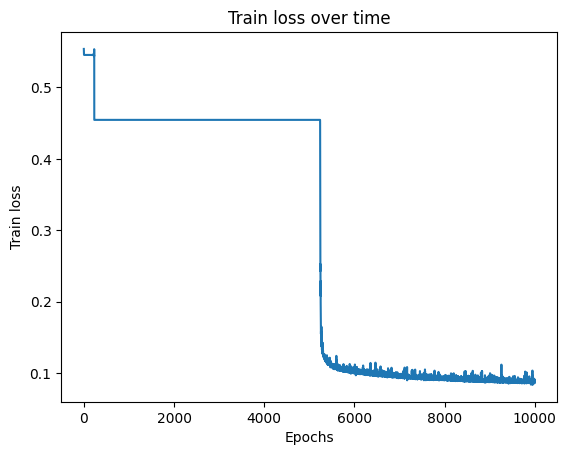

In [4]:
# Gráfico del error de entrenamiento
plt.plot(history.history['loss'])
plt.title("Train loss over time")
plt.xlabel("Epochs")
plt.ylabel("Train loss")
plt.show()

In [10]:
# Calcular la precisión
correct_predictions = 0
total_predictions = len(Y_test)

for i in range(total_predictions):
    if Y_test[i] == Y_pred[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions

# Graficar el accuracy
print("Accuracy: ", accuracy)

Accuracy:  0.0


In [11]:
##Edad: 63
#Sexo: 1 (hombre)
#Tipo de dolor de pecho: 3 (dolor atípico)
#Presión arterial en reposo: 145
#Colesterol sérico en mg/dl: 233
#Azúcar en sangre en ayunas > 120 mg/dl: 1 (verdadero)
#Resultados electrocardiográficos en reposo: 0
#Frecuencia cardíaca máxima alcanzada: 150
#Ejercicio inducido angina: 0 (no)
#ST depression inducido por el ejercicio relativo al descanso: 2.3
#Pendiente del segmento ST de ejercicio pico: 0
#Número de vasos principales coloreados por flourosopía: 0
#Talasemia: 1


new_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]) # Datos de prueba
prediction = model.predict(new_data)
print("Prediction:", prediction)

1/1 [==============================] - 0s 42ms/step
Prediction: [[1.6792447e-09]]
